In [5]:
#AcmeForecast Data:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

file_path = '/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
numerical_summary = df.describe()

categorical_summary = df.describe(include=['object'])

missing_values = df.isnull().sum()

numerical_summary, categorical_summary, missing_values


(               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
 count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
 mean     36.923810   802.485714          9.192517     2.912925            1.0   
 std       9.135373   403.509100          8.106864     1.024165            0.0   
 min      18.000000   102.000000          1.000000     1.000000            1.0   
 25%      30.000000   465.000000          2.000000     2.000000            1.0   
 50%      36.000000   802.000000          7.000000     3.000000            1.0   
 75%      43.000000  1157.000000         14.000000     4.000000            1.0   
 max      60.000000  1499.000000         29.000000     5.000000            1.0   
 
        EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
 count     1470.000000              1470.000000  1470.000000     1470.000000   
 mean      1024.865306                 2.721769    65.891156        2.729932   
 std        602.0243

In [ ]:
df['Attrition'].value_counts()

df['EducationField'].unique()

df['Gender'].value_counts()

df.columns

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

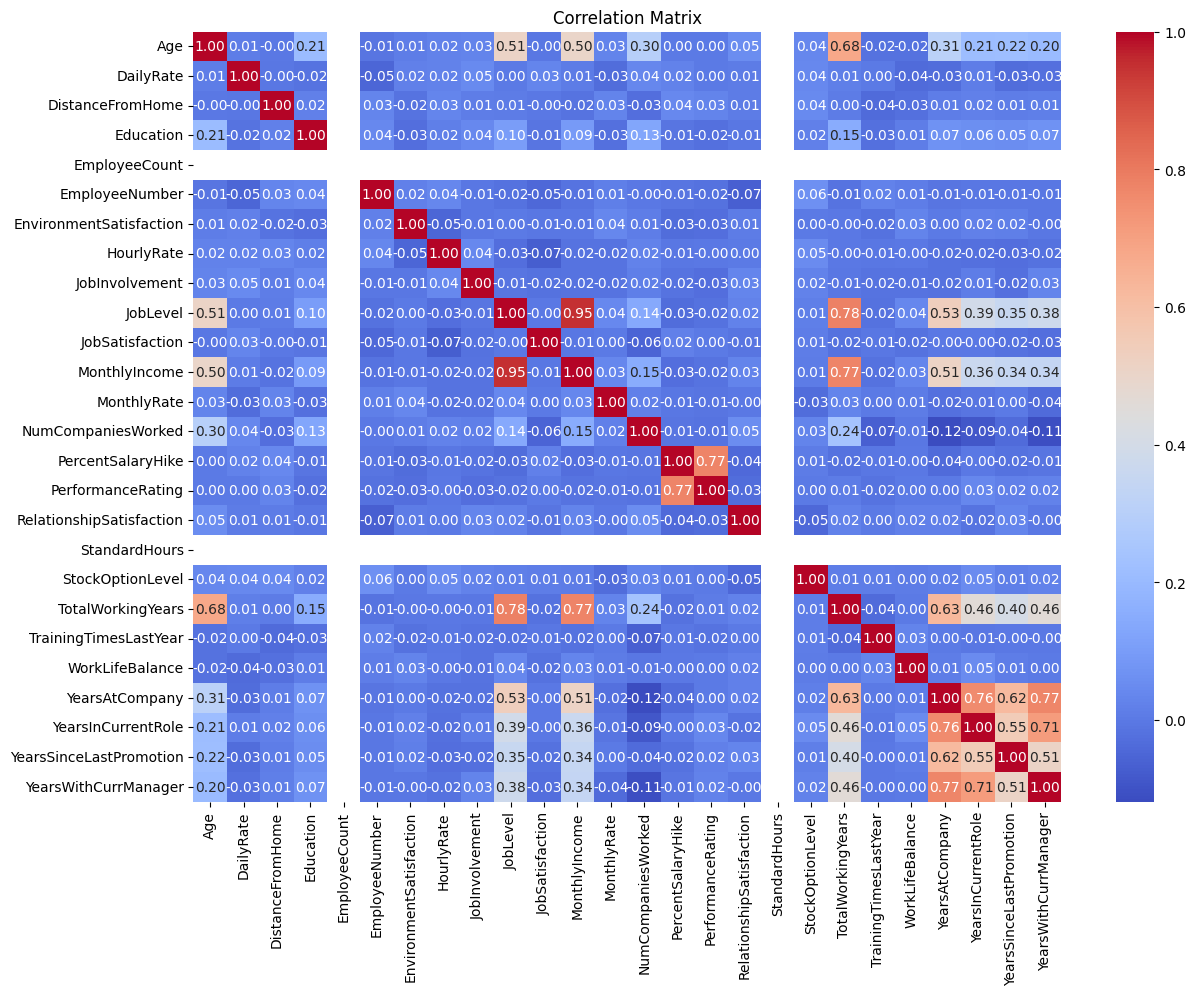

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [ ]:
# Compute the correlation matrix
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


numerical_df.skew()

In [7]:
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df = df.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])

categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [8]:
#Linear-regression analysis:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_metrics = evaluate_model(lr, X_test, y_test)

In [9]:
#Random-Forest model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_metrics = evaluate_model(rf, X_test, y_test)

In [10]:
#GBC

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_metrics = evaluate_model(gb, X_test, y_test)

In [11]:
print("Model Evaluation Metrics:")
print("Logistic Regression: Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*lr_metrics))
print("Random Forest: Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*rf_metrics))
print("Gradient Boosting: Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*gb_metrics))

print("\nClassification Reports:")
print("Logistic Regression:")
print(classification_report(y_test, lr.predict(X_test)))

print("Random Forest:")
print(classification_report(y_test, rf.predict(X_test)))

print("Gradient Boosting:")
print(classification_report(y_test, gb.predict(X_test)))

Model Evaluation Metrics:
Logistic Regression: Accuracy: 0.8605, Precision: 0.6154, Recall: 0.3404, F1 Score: 0.4384
Random Forest: Accuracy: 0.8333, Precision: 0.4167, Recall: 0.1064, F1 Score: 0.1695
Gradient Boosting: Accuracy: 0.8503, Precision: 0.5882, Recall: 0.2128, F1 Score: 0.3125

Classification Reports:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79      


# Insights: Overall Accuracy:-

# Logistic Regression: 86.05%
# Random Forest: 83.33%
# Gradient Boosting: 85.03%
# Logistic Regression has the highest overall accuracy, indicating it correctly classifies the majority of the instances.
